In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
df=pd.read_csv("HR_comma_sep.csv")

## Analyzing the data

In [74]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [75]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2449,0.91,0.70,3,132,4,0,0,0,sales,medium
6397,0.81,0.75,4,206,3,0,0,0,IT,medium
10426,0.69,0.80,3,212,4,0,0,0,support,low
12767,0.44,0.54,2,127,3,0,1,0,management,medium
5679,0.21,0.53,3,229,5,0,0,0,accounting,medium
11422,0.55,0.58,3,254,2,0,0,0,management,high
9503,0.51,0.59,4,169,3,0,0,0,technical,low
4810,0.78,0.87,4,264,3,0,0,0,accounting,medium
12373,0.36,0.57,2,142,3,0,1,0,product_mng,medium
1935,0.39,0.45,2,140,3,0,1,0,sales,medium


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [77]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [78]:
df.shape

(14999, 10)

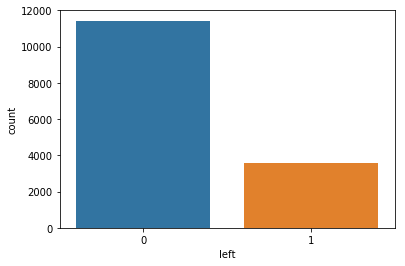

In [79]:
sns.countplot(x="left",data=df)

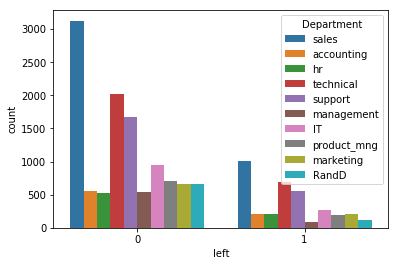

In [80]:
sns.countplot(x="left", hue="Department",data=df)

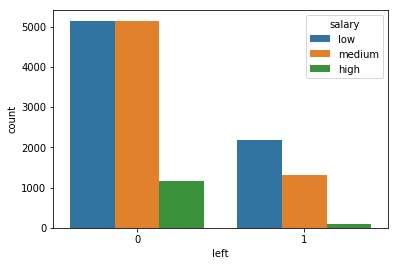

In [81]:
sns.countplot(x="left", hue="salary",data=df)

In [82]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
Department = pd.get_dummies(df['Department'])
Department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [84]:
salary = pd.get_dummies(df['salary'])
salary.sample(5)

,high,low,medium
13863,0,1,0
6541,0,1,0
14619,0,1,0
13560,1,0,0
4659,0,0,1


In [85]:
salary = pd.get_dummies(df['salary'],drop_first=True)
salary.sample(5)

,low,medium
10365,0,1
6560,0,1
6566,0,1
8709,1,0
3852,0,0


In [86]:
df=pd.concat([df,Department,salary],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [87]:
df.drop(['Department','salary'],axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


## split the data

In [88]:
x = df.drop('left',axis=1)
y = df['left']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)

## Fit the model

In [90]:
model = LogisticRegression()

In [91]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
predictions = model.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7911111111111111